<a href="https://colab.research.google.com/github/DamianKluczyn/ML-Mini-Projects/blob/main/CaliforniaHousing_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Understanding data:**

In [1]:
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing(as_frame=True)

In [2]:
print(housing_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

**Ovierview of the dataset**




In [3]:
housing_data.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Data for predictions**

In [4]:
housing_data.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


**Distribution of features**

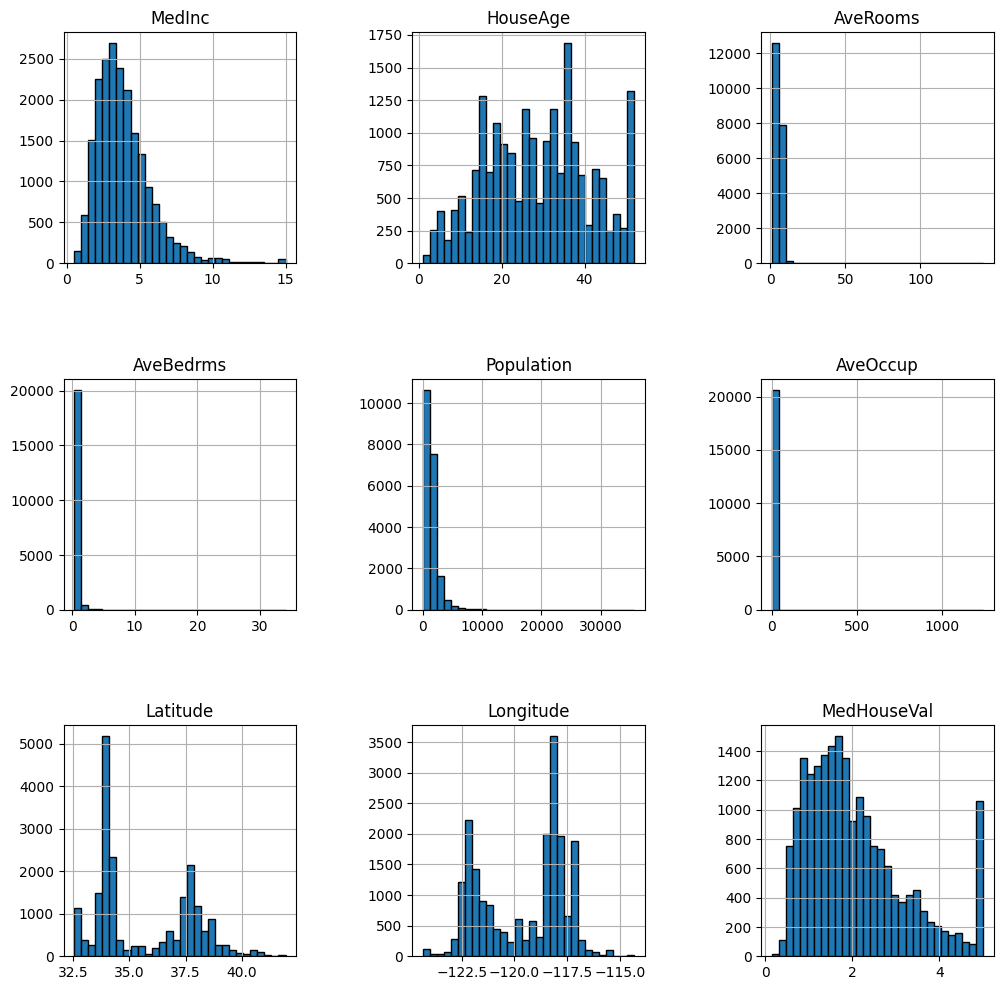

In [5]:
import matplotlib.pyplot as plt

housing_data.frame.hist(figsize=(12,12), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.5, wspace=0.5)

Looking at distibution of average income we can see that it is normal with long tail, informing us that most of the people are average with few getting high paying jobs.


House value seems to cover with income but we can clearly see threshold-effect: houses above 5 are classified as 5.

In [6]:
features = ["HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup"]
housing_data.frame[features].describe()

,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,5.429000,1.096675,1425.476744,3.070655
std,12.585558,2.474173,0.473911,1132.462122,10.386050
min,1.000000,0.846154,0.333333,3.000000,0.692308
25%,18.000000,4.440716,1.006079,787.000000,2.429741
50%,29.000000,5.229129,1.048780,1166.000000,2.818116
75%,37.000000,6.052381,1.099526,1725.000000,3.282261
max,52.000000,141.909091,34.066667,35682.000000,1243.333333


Comparing values of 75% and max we can clearly see that stament we made above about more expensive houses is correct.

As we deleted longitude and latitude from our predicitions we can at least visualise this data

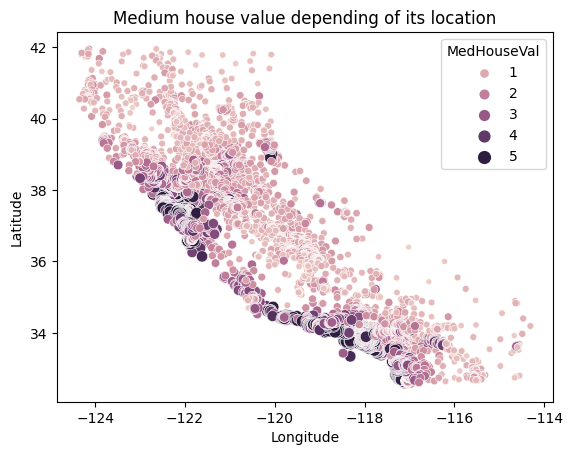

In [7]:
import seaborn as sns

sns.scatterplot(
    data=housing_data.frame,
    x="Longitude",
    y="Latitude",
    hue="MedHouseVal",
    size="MedHouseVal",
)
plt.legend(title="MedHouseVal")
_ = plt.title("Medium house value depending of its location")

Now we can make analysis of data that are important for us at the moment

In [8]:
import pandas as pd

columns_drop = ["Longitude", "Latitude", "MedInc"]
cleared_data = housing_data.frame.drop(columns=columns_drop)

cleared_data["MedHouseVal"] = pd.qcut(cleared_data["MedHouseVal"], 5, retbins=False)
cleared_data["MedHouseVal"] = cleared_data["MedHouseVal"].apply(lambda x: x.mid)

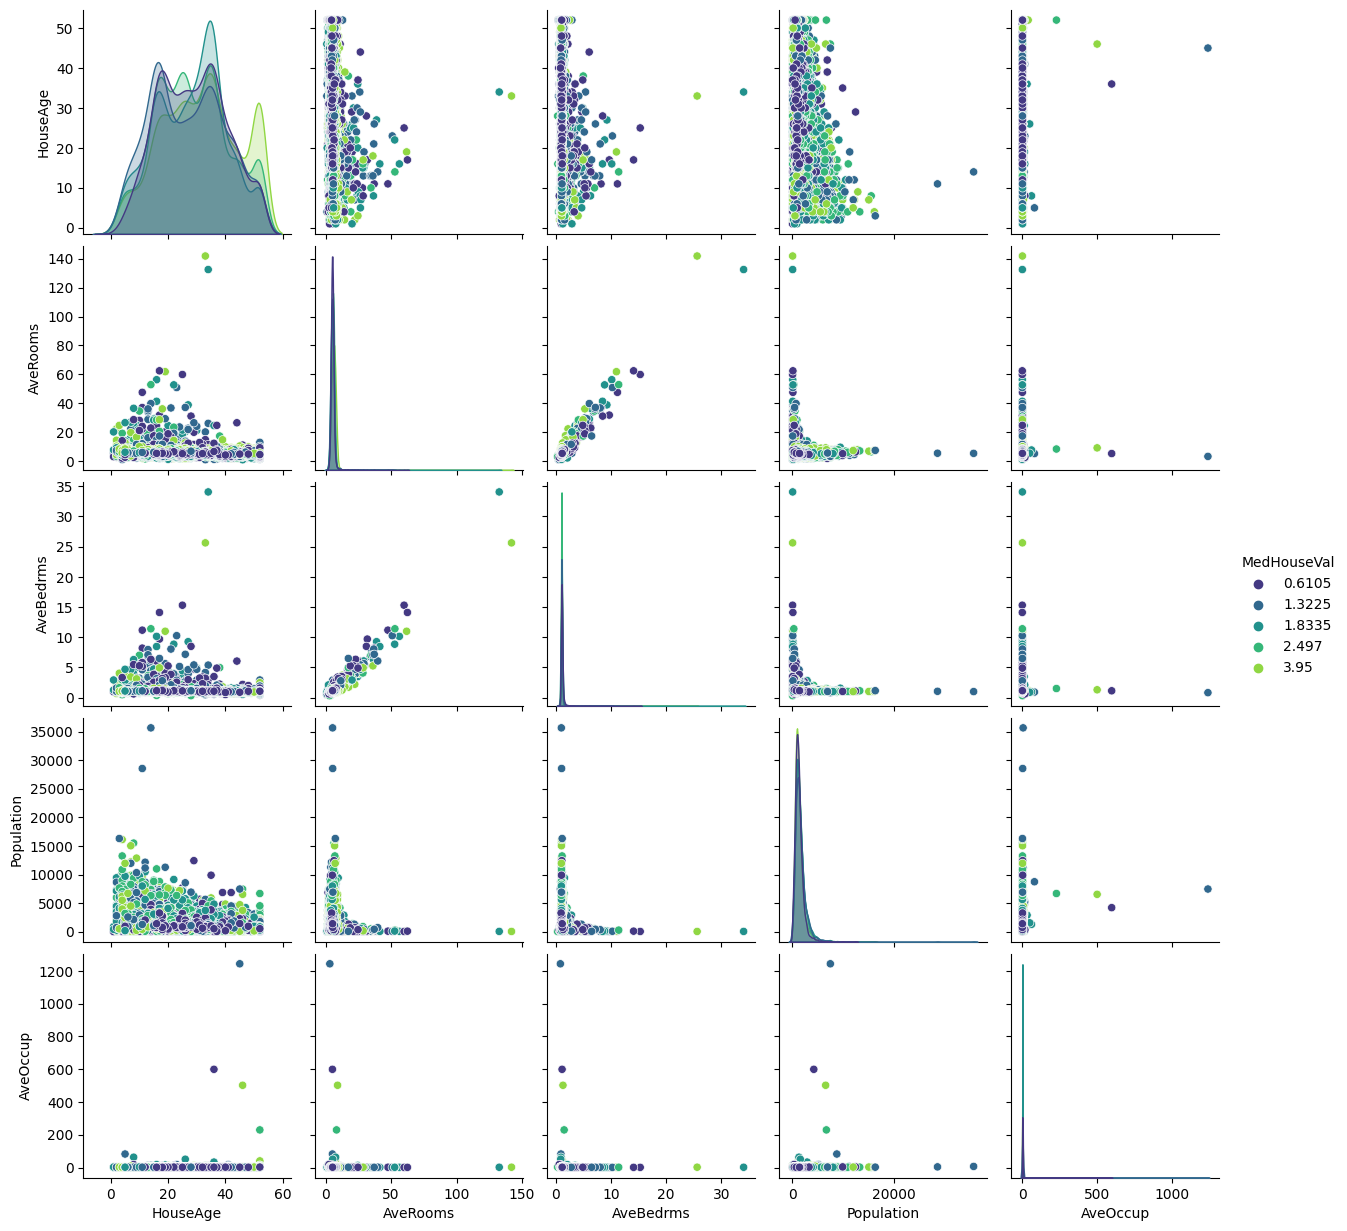

In [9]:
_ = sns.pairplot(data=cleared_data, hue="MedHouseVal", palette="viridis")

Assigning data for predictions and splitting it

In [10]:
from sklearn.model_selection import train_test_split

X = housing_data.data
Y = housing_data.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Initialization of the model and training



In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Predicting values for test data, evaluating model

In [12]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)

mse = mean_squared_error(Y_test, predictions)
print(f"MSE: {mse}")

MSE: 0.5558915986952444


**Trying to improve the prediction value**

In [14]:
from sklearn.feature_selection import SelectKBest, f_regression

#Searching for best features
selector = SelectKBest(score_func=f_regression, k=5)
X_train_new = selector.fit_transform(X_train, Y_train)
X_test_new = selector.transform(X_test)

mask = selector.get_support() #list of values True/False
new_features = X_train.columns[mask]
print(new_features)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude'], dtype='object')


Feature scaling - standarizing features to same variation

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_new)
X_test_scaled = scaler.transform(X_test_new)

Training, predicting and evaluating new model

In [16]:
model_new = LinearRegression()
model_new.fit(X_train_scaled, Y_train)

predictions = model_new.predict(X_test_scaled)

mse_new = mean_squared_error(Y_test, predictions)

In [17]:
print(f"Old MSE: {mse}")
print(f"New MSE: {mse_new}")

Old MSE: 0.5558915986952444
New MSE: 0.6382565441555915


# **As we can see scaling and selecting best features improved our model by 15% or 0.8 precentage points, of course this is not the best predicition but data is not that easy so it is acceptable at the moment**